In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
tragitti = tragitti[clean(tragitti)]
tragitti = tragitti[tragitti[distance_param] >= 2.]
public_batte_car = tragitti[tragitti['Public'] <= tragitti['Car']][['FDistance', 'Month', 'Day', 'Hour', 'Minute', 'Public', 'Car']]
len(public_batte_car)

252

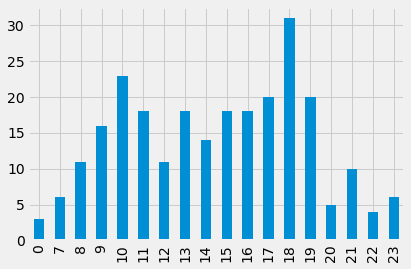

In [3]:
public_batte_car['Hour'].value_counts().sort_index().plot.bar()
plt.show()

In [4]:
p1 = pd.crosstab(
    index=pd.cut(public_batte_car['FDistance'], bins=[0., 3., 6., 10.]),
    columns='Abs. frequence')

In [5]:
p2 = pd.crosstab(
    index=pd.cut(tragitti['FDistance'], bins=[0., 3., 6., 10.]),
    columns='Abs. frequence')

In [6]:
(p1 / p2).apply(lambda e: np.round(e*100, 2))

col_0,Abs. frequence
FDistance,
"(0.0, 3.0]",0.80
"(3.0, 6.0]",0.51
"(6.0, 10.0]",0.25
